# Загрузка Датасета

In [ ]:
pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 10.2MB/s]


In [ ]:
! unzip heart-attack-analysis-prediction-dataset

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


# Необходимые для работы библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Изучение начальных данных Датасета

In [3]:
df.head()

NameError: name 'df' is not defined

In [ ]:
# Переименуем названия столбцов на русский язык

df.rename(columns={
    "age":"Возраст",
    "sex":"Пол",
    "cp":"Боль в груди",
    "trtbps":"Арт.давление в покое",
    "chol":"Холестерин",
    "fbs":"Уровень сахара в крови",
    "restecg":"Результаты ЭКГ",
    "thalachh":"Макс. сердцебиение",
    "exng":"Стенокардия",
    "oldpeak":"Депрессия ST",
    "slp":"Наклон пикового ST",
    "caa":"Количество крупных судов",
    "thall":"Таллий",
    "output":"Сердечный приступ"
}, inplace=True)

In [ ]:
df.head()

In [ ]:
# Узнаем количество строк и столбцов

df.shape

In [ ]:
# Проверка на дуликаты

df.duplicated().sum()

In [ ]:
# Убираем дубликаты

df.drop_duplicates(inplace=True)
df.shape

In [ ]:
# Посмотрим общую информацию Датасета

df.info()

In [ ]:
# В Датасете 14 столбцов и 302 строки
# Все значения в числовом формате - float64 или int64
# Значения NaN отсутствуют

In [ ]:
df.isnull().sum()

In [ ]:
# Подсчитаем количество уникальных знаечний в каждом столбце

df.nunique()

unique_value = []
for i in df.columns:
    value = df[i].nunique()
    unique_value.append(value)

pd.DataFrame(data=unique_value,index=df.columns , columns=['unique_values'])

In [ ]:
# Из свода данных видно что переменные с малым количеством уникальных значений являются категоральными.
# Переменные с большим количеством уникальных значений являются числовыми.

num_var = ["Возраст","Арт.давление в покое","Холестерин","Макс. сердцебиение","Депрессия ST"]
cat_var = ["Пол","Боль в груди","Уровень сахара в крови","Результаты ЭКГ","Стенокардия","Наклон пикового ST","Количество крупных судов","Таллий","Сердечный приступ"]

In [ ]:
# Посмотрим на статистику числовых переменных

df[num_var].describe().T

In [ ]:
# Проверим столбец Сердечный приступ на баланс

df['Сердечный приступ'].value_counts(normalize=True)

In [ ]:
# Как видно столбец сбалансирован - примерное соотношение классов 54/46.

# EDA (исследование данных)

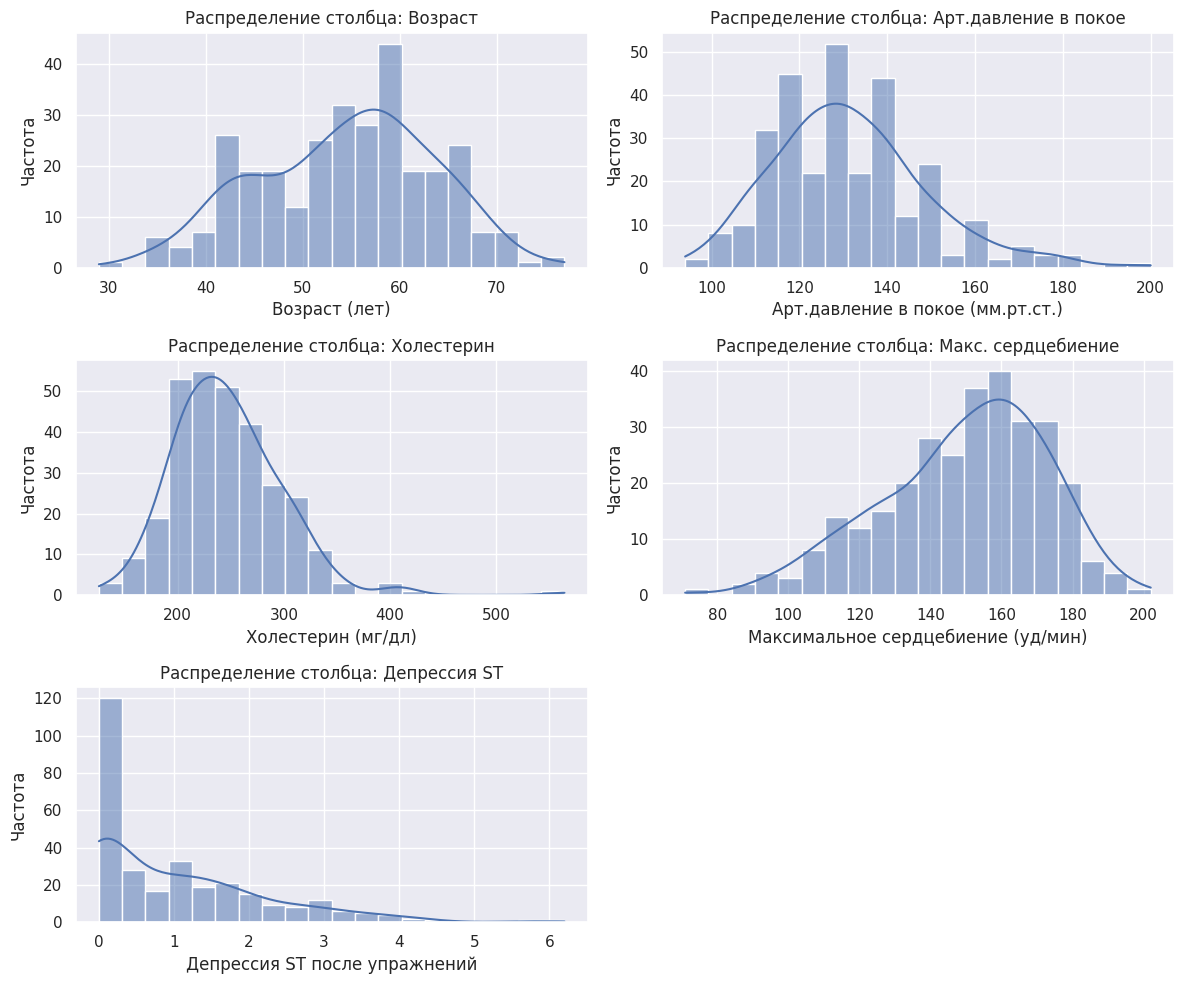

In [ ]:
# Построим графики распределения числовых переменных

sns.set_theme()

num_var = ["Возраст","Арт.давление в покое","Холестерин","Макс. сердцебиение","Депрессия ST"]
labels = ['Возраст (лет)', 'Арт.давление в покое (мм.рт.ст.)', 'Холестерин (мг/дл)',
          'Максимальное сердцебиение (уд/мин)', 'Депрессия ST после упражнений']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes = axes.flatten()

for i, (column, label) in enumerate(zip(num_var, labels)):
    # Plotting distribution using seaborn's displot function
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(label)  # Set x-axis label
    axes[i].set_ylabel('Частота')  # Set y-axis label
    axes[i].set_title(f'Распределение столбца: {column}') # Add title

axes[-1].axis('off')

plt.tight_layout()
plt.show()

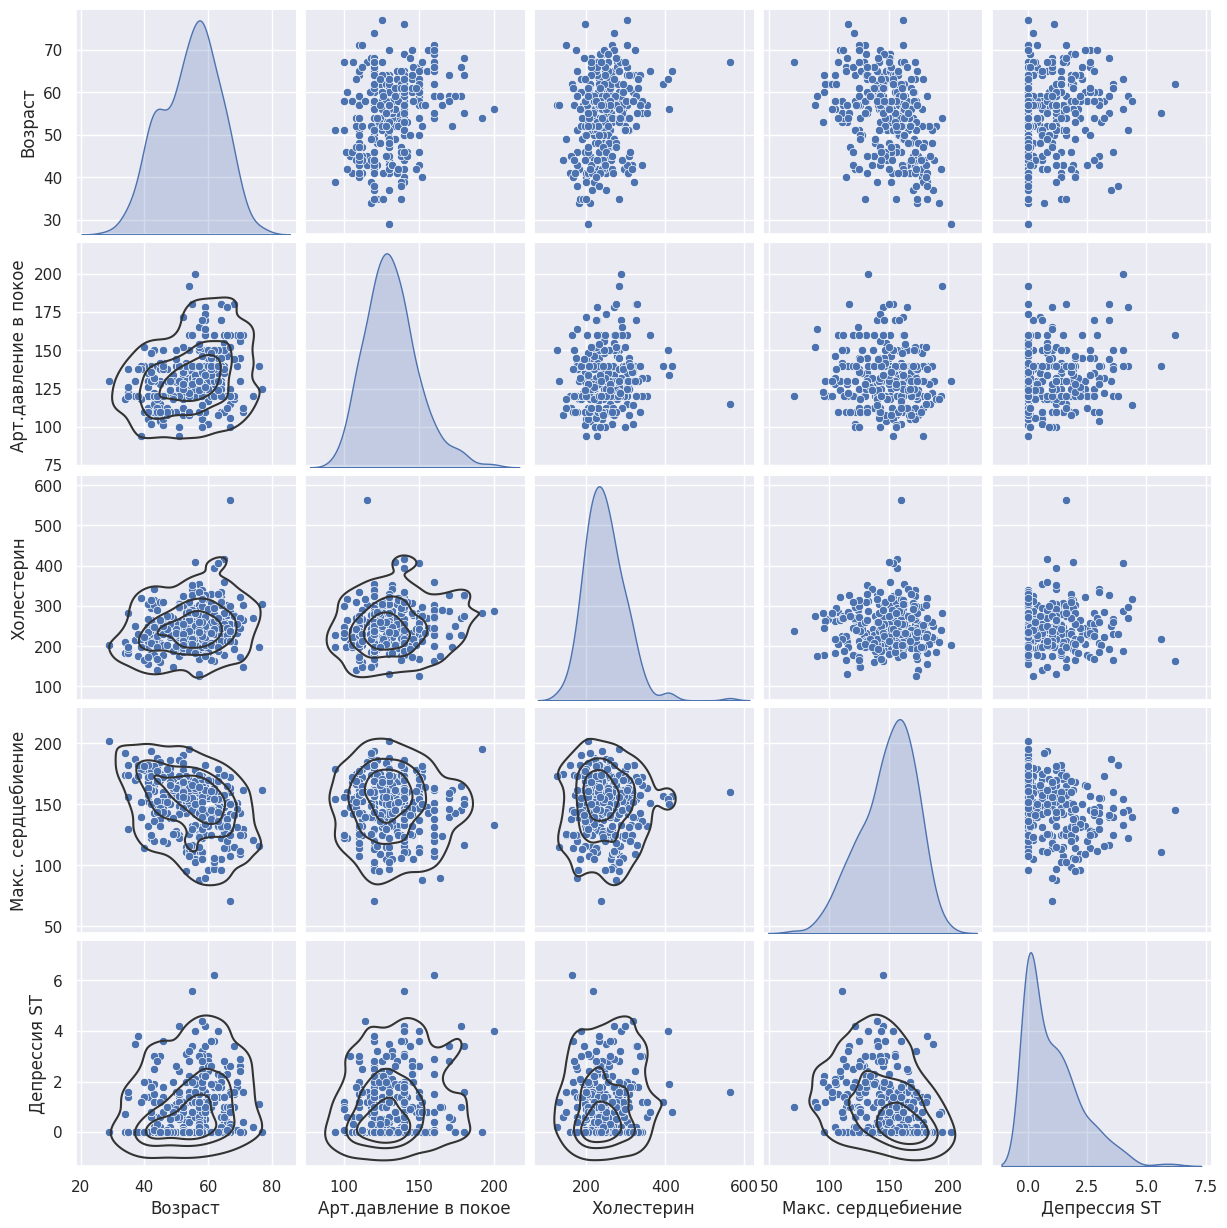

In [ ]:
graph = sns.pairplot(df[num_var],diag_kind = 'kde')
graph.map_lower(sns.kdeplot,levels=4,color='.2')
plt.show()

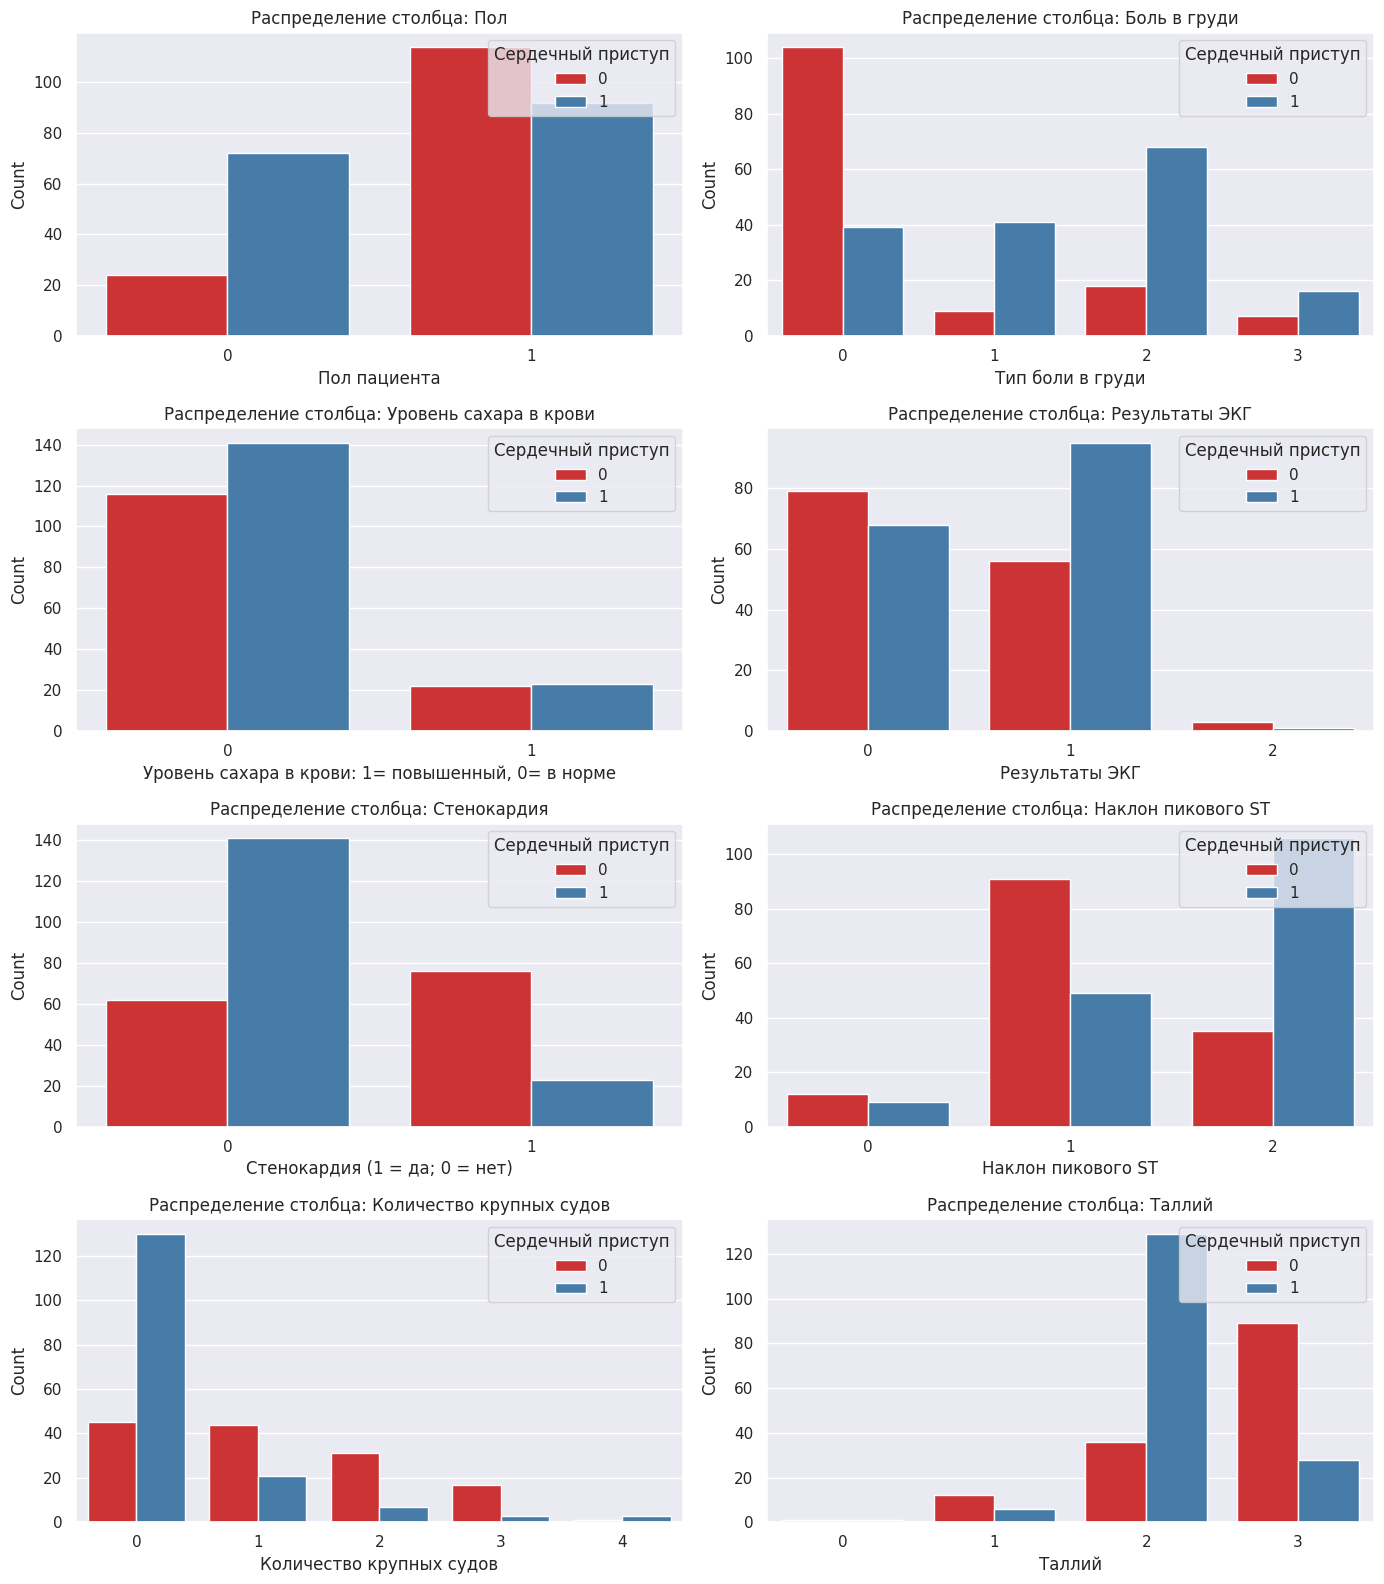

In [ ]:
# Построим графики распределения категоральных переменных (Группировки с целевым признаком)

cat_var = ["Пол","Боль в груди","Уровень сахара в крови","Результаты ЭКГ","Стенокардия","Наклон пикового ST","Количество крупных судов","Таллий","Сердечный приступ"]
labels = ['Пол пациента', 'Тип боли в груди', 'Уровень сахара в крови: 1= повышенный, 0= в норме',
          'Результаты ЭКГ', 'Стенокардия (1 = да; 0 = нет)',
          'Наклон пикового ST', 'Количество крупных судов', 'Таллий']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

axes = axes.flatten()

for i, (column, label) in enumerate(zip(cat_var, labels)):
    sns.countplot(data=df, x=column, hue='Сердечный приступ', ax=axes[i], palette='Set1')
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Сердечный приступ', loc='upper right')
    axes[i].set_title(f'Распределение столбца: {column}')

plt.tight_layout()
plt.show()

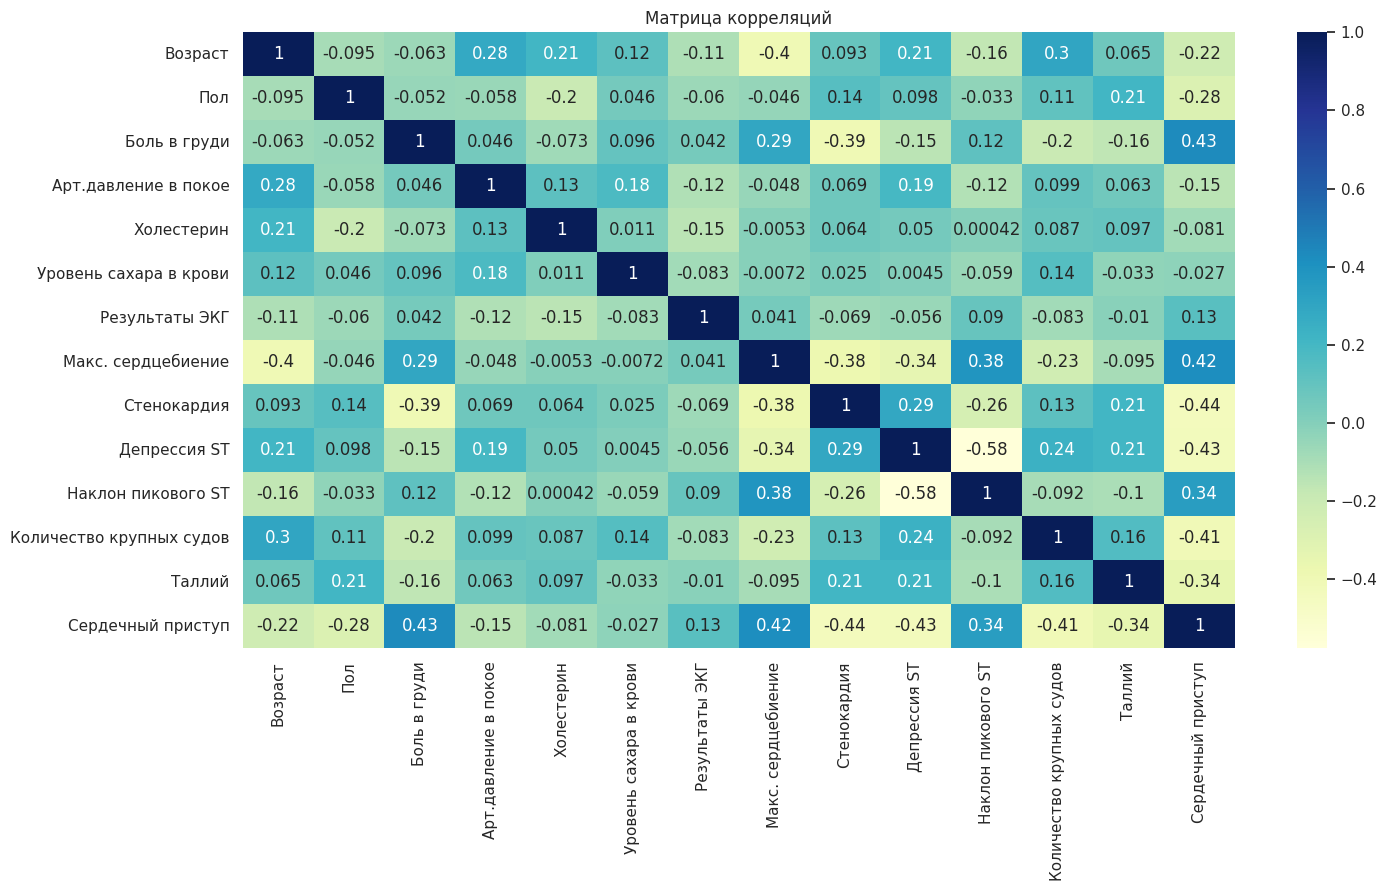

In [ ]:
# Построим матрицу корреляций

plt.figure(figsize=(16, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
plt.title('Матрица корреляций')
plt.show()

In [ ]:
px.imshow(df.corr(),title="Матрица корреляций")

# Моделирование

# KNN

In [ ]:
X = df.drop('Сердечный приступ', axis=1)
y = df['Сердечный приступ']

# Все признаки у нас числовые

In [ ]:
# импортируем модули, необходимые для обучения и оценки
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # функция разделения на train test
from sklearn.metrics import accuracy_score # доля верно угаданных ответов
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# разбиваем матрицу признаков и ответы на обучающую и тестовую выборки (80 / 20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Нормируем данные

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Сперва попробуем с K = 3

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[27  2]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



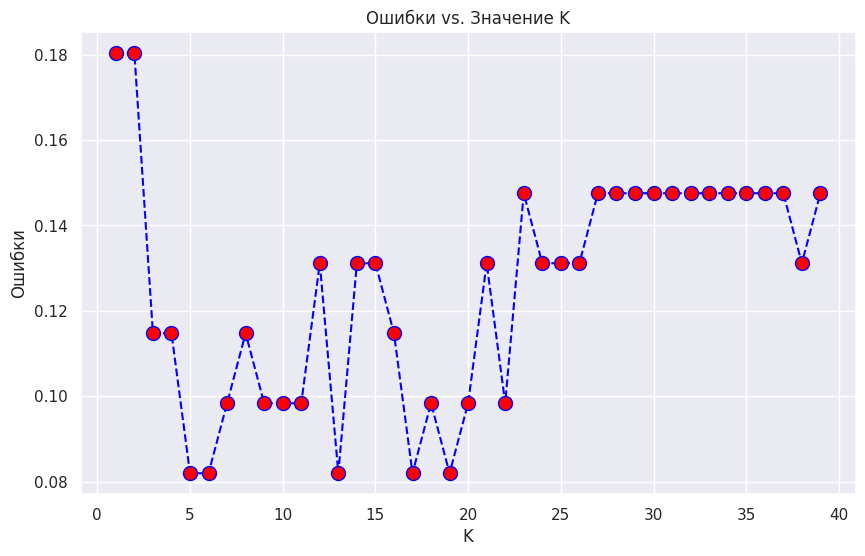

In [ ]:
# Найдем лучшее значение k

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Ошибки vs. Значение K')
plt.xlabel('K')
plt.ylabel('Ошибки')
plt.show()

In [ ]:
# Наименьший уровень ошибки при K=6

In [ ]:
# Построим KNN с K = 6

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[28  1]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [ ]:
# Сперва построим простую модель

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression(max_iter=300)
logmodel.fit(X_train, y_train)

log_pred = logmodel.predict(X_test)

print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

[[25  4]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
# Построим модель с Регуляризацией

from sklearn.linear_model import LogisticRegressionCV
lr_l2 = LogisticRegressionCV(Cs=20, cv=4, penalty='l2').fit(X_train, y_train)
l2_pred = lr_l2.predict(X_test)

print(confusion_matrix(y_test, l2_pred))
print(classification_report(y_test, l2_pred))

[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# МЕТОД ОПОРНЫХ ВЕКТОРОВ

In [ ]:
# Простая модель метода опорных векторов

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train.values.ravel())
svc_pred = svc.predict(X_test)

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[27  2]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [ ]:
# Подберем параметры с помощью GridSearchCV

from sklearn.model_selection import GridSearchCV

params_grid = {
    'C': [0.05, 0.1, 0.5, 1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

model = SVC()

grid_search = GridSearchCV(estimator = model,
                           param_grid = params_grid,
                           scoring='f1',
                           cv = 5, verbose = 1)

grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'C': 0.1, 'kernel': 'sigmoid'}

In [ ]:
# Метод опорных векторов с подобранными параметрами

best_svc = SVC(C=0.1, kernel='sigmoid')
best_svc.fit(X_train, y_train.values.ravel())

svc_pred = best_svc.predict(X_test)

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[24  5]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# СРАВНЕНИЕ МОДЕЛЕЙ

In [ ]:
print("\n")
print("KNN МОДЕЛЬ")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

print("Модель логистической регресии")
print(confusion_matrix(y_test, l2_pred))
print(classification_report(y_test, l2_pred))

print("\n")
print("Метод опорных векторов")
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))



KNN МОДЕЛЬ
[[28  1]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Модель логистической регресии
[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Метод опорных векторов
[[24  5]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   

In [ ]:
# Можно сделать вывод что модель KNN справилась лучше - precision, recall, f1-score показывают лучшие значения именно с этой моделью.